In [247]:
# Import necessary libraries
import pandas as pd, shutil, os
import yfinance as yf
import datetime as dt
import numpy as np
from pathlib import Path
from termcolor import colored as cl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [ ]:
# Get S&P 500 tickers
sp500_tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
sp500_tickers = sp500_tickers.Symbol.to_list()
# sp500_tickers

In [ ]:
# Clean Tickers of periods
sp500_tickers = [x.replace(".", "-") for x in sp500_tickers]
sp500_tickers.sort()
sp500_tickers

In [210]:
# Define Start and End dates for hist. data(5 yr)
end_date = dt.datetime.now().date().isoformat()
start_date = dt.datetime.now() - dt.timedelta(weeks=52)
start_date = start_date.date().isoformat()
start_date, end_date

('2020-08-18', '2021-08-17')

In [ ]:
# Removes old Stock_Data folder and replaces it with a new, empty one
shutil.rmtree("Stock_Data")
os.mkdir("Stock_Data")

In [ ]:
sp_data = yf.download(sp5_tickers, period="5d", group_by="Ticker")
sp_data

In [ ]:
csv_path = Path("Stock_Data/Stock_Data.json")

In [ ]:
stock_dict = {}

In [ ]:
sp_data_j = sp_data.to_json()

In [ ]:
type(stock_dict)

In [ ]:
type(sp_data_j)

In [ ]:
sp_data_j = json.loads(sp_data_j)
type(sp_data_j)

In [ ]:
print(json.dumps(sp_data_j, indent=4))

In [ ]:
# reading the JSON data using json.load()
# file = 'data.json'
# with open(file) as train_file:
#     dict_train = json.load(train_file)

# converting json dataset from dictionary to dataframe
train = pd.DataFrame.from_dict(sp_data_j, orient='index')
train.reset_index(level=0, inplace=True)

In [ ]:
train

In [ ]:
with open(csv_path, 'w') as outfile:
     json.dump(sp_data.to_json(), outfile, indent=4)

In [ ]:
with open(csv_path, "r") as infile:
    stock_dict = json.dump(infile)
    
stock_dict

In [ ]:
json_file = open(csv_path, "r").read()
# stock_d = json.load(json_file)
# json_file.close()
# print(json.dumps(stock_d, indent=4, sort_keys=True))
# data = urlopen(q).read()
json_data = json.loads(json_file) # DECODE THE STRING 
with open('output.json', 'w') as out:
    json.dump(json_data, out, indent=4) # DO NOT CALL STR ON IT AGAIN

print(json.dumps(out))

In [48]:
def ForwardPE():
    tick_list = []
    forwardPE = []
    count = 0
    for ticker in sp5_tickers:
        info = yf.Ticker(ticker).info
        info["Ticker"] = ticker
        forwardPE.append(info["forwardPE"])
        tick_list.append(info["Ticker"])
        count+=1
        print(count)
    pe_df = pd.DataFrame(data=forwardPE, index=tick_list, columns=["Forward P/E"])
    pe_df.sort_values(by="Forward P/E", ascending=False, inplace=True)
    
    return pe_df
# fin = yf.Ticker("MSFT").info

In [49]:
ForwardPE()

1
2
3
4
5


,Forward P/E
ABMD,61.500954
ACN,32.837563
ABT,26.521551
MMM,18.976349
ABBV,8.337867


In [ ]:
# def calcRSI (ticker):
#     data = yf.download(ticker, period="5y", groupby="Ticker")
#     data["Moving_Avg_200_Days"] = data["Adj Close"].rolling(window=200).mean()
#     data["Price_Change"] = data["Adj Close"].pct_change()
#     data["Gains"] = data["Price_Change"].apply(lambda x: x if x > 0 else 0)
#     data["Losses"] = data["Price_Change"].apply(lambda x: abs(x) if x < 0 else 0)
#     data["Avg_Up"] = data["Gains"].ewm(span=19).mean()
#     data["Avg_Down"] = data["Losses"].ewm(span=19).mean()
#     data = data.dropna()
#     data["RS"] = data["Avg_Up"]/data["Avg_Down"]
#     data["RSI"] = data["RS"].apply(lambda x: 100 - (100/(x+1)))
#     return data

In [215]:
def calc_indicators (ticker):
    data = yf.download(ticker, start= start_date,end=end_date)
    data["Ticker"] = ticker
#     data["Moving_Avg_200_Days"] = data["Adj Close"].rolling(window=200).mean()
    data["MA12"] = data.Close.ewm(span=12).mean()
    data["MA26"] = data.Close.ewm(span=26).mean()
    data["MACD"] = data.MA12 - data.MA26
    data["Signal"] = data.loc[:,"MACD"].ewm(span=9).mean()
    data["HIST"] = data.loc[:,"MACD"] - data.loc[:, "Signal"]
    data["SMA50"] = data.loc[:,"Close"].rolling(window=50).mean()
    data["SMA50%"] = ((data.loc[:,"Close"] - data.loc[:, "SMA50"])/data.loc[:, "SMA50"])*100
    data["Price_Change"] = data["Adj Close"].pct_change()
#     temp1 = data['Price_Change']
    data['Gains'] = data.loc[:,"Price_Change"].apply(lambda x: x if x > 0 else 0)
#     data["Gains"] = data.iloc[:,7].apply(lambda x: x if x > 0 else 0)
    data["Losses"] = data.loc[:,"Price_Change"].apply(lambda x: abs(x) if x < 0 else 0)
#     data["Losses"] = data.iloc[:,7].apply(lambda x: abs(x) if x < 0 else 0)
#     temp2 = data["Gains"]
#     temp3 = data["Losses"]
    data["Avg_Up"] = data.loc[:,"Gains"].ewm(com=13,adjust=False, min_periods=14).mean()
#     temp4 = data["Avg_Up"]
    data["Avg_Down"] = data.loc[:, "Losses"].ewm(com=13,adjust=False, min_periods=14).mean()
#     temp5 = data["Avg_Down"]

#     temp6 = temp4/temp5
    data["RS"] = data.loc[:, "Avg_Up"]/data.loc[:,"Avg_Down"]
    data["RSI"] = data.loc[:,"RS"].apply(lambda x: 100 - (100/(x+1)))
    data = data.dropna()
    
    
    
#     temp7 = data["RSI"]
#     output_df = pd.DataFrame(columns=["Ticker", "RSI"])
#     output_df = output_df.append({"Ticker" : ticker,
#                                  "RSI" : temp7},
#                                 ignore_index=True)
#     today = data.iloc[-1]
#     output_df = pd.DataFrame(columns=["Ticker","RSI"])
#     output_df = pd.merge(output_df,today[["Ticker", "RSI"]], on="Ticker", how="left")
    return data

In [219]:
calcRSI("MMM")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Ticker,MA12,MA26,MACD,...,HIST,SMA50,SMA50%,Price_Change,Gains,Losses,Avg_Up,Avg_Down,RS,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-27,164.500000,164.979996,160.649994,161.029999,157.187378,3894400,MMM,167.189772,166.529439,0.660333,...,-0.489816,165.233000,-2.543682,-0.030874,0.000000,0.030874,0.004792,0.007179,0.667454,40.028316
2020-10-28,159.809998,162.850006,158.119995,158.529999,154.747055,3065100,MMM,165.857233,165.924954,-0.067721,...,-0.974293,165.116000,-3.988712,-0.015525,0.000000,0.015525,0.004450,0.007775,0.572262,36.397378
2020-10-29,158.110001,160.179993,156.130005,158.479996,154.698242,2680900,MMM,164.722082,165.363207,-0.641125,...,-1.238155,165.006200,-3.955127,-0.000315,0.000000,0.000315,0.004132,0.007243,0.570482,36.325279
2020-10-30,158.330002,159.960007,157.000000,159.960007,156.142929,2234500,MMM,163.989351,164.956079,-0.966729,...,-1.251005,164.946000,-3.022804,0.009339,0.009339,0.000000,0.004504,0.006725,0.669668,40.107861
2020-11-02,162.190002,163.419998,160.929993,162.940002,159.051819,2116600,MMM,163.827893,164.804363,-0.976470,...,-1.008595,164.970600,-1.230885,0.018630,0.018630,0.000000,0.005513,0.006245,0.882753,46.886291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10,198.240005,199.490005,197.699997,199.250000,199.250000,1598400,MMM,198.673503,198.954725,-0.281223,...,-0.133504,199.260201,-0.005119,0.009218,0.009218,0.000000,0.003737,0.003570,1.046846,51.144348
2021-08-11,200.000000,201.770004,199.309998,201.570007,201.570007,2217400,MMM,199.119119,199.148450,-0.029331,...,0.094710,199.227601,1.175744,0.011644,0.011644,0.000000,0.004302,0.003315,1.297741,56.479003
2021-08-12,201.479996,202.369995,200.360001,201.429993,201.429993,1231800,MMM,199.474638,199.317453,0.157185,...,0.224981,199.190401,1.124347,-0.000695,0.000000,0.000695,0.003995,0.003128,1.277155,56.085558


In [260]:
def get_chart(ticker):
    df = calc_indicators(ticker)
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((7,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(df.Close)
    ax2.plot(df.MACD, color = 'black', linewidth = 1.5, label = 'MACD')
    ax2.plot(df.Signal, color = 'violet', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(df.Close)):
        if str(df.HIST[i])[0] == '-':
            ax2.bar(df.Close.index[i], df.HIST[i], color = 'red')
        else:
            ax2.bar(df.Close.index[i], df.HIST[i], color = 'green')

    plt.legend(loc = 'lower right')

In [261]:
plt.bar

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

[*********************100%***********************]  1 of 1 completed


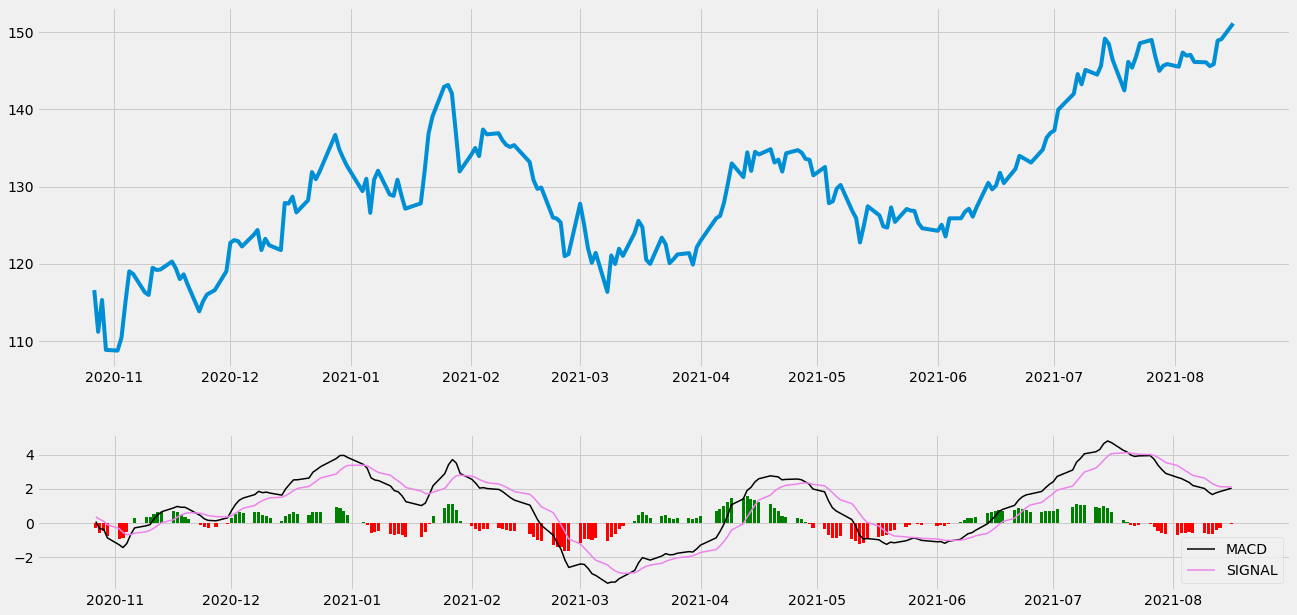

In [262]:
get_chart("AAPL")

In [189]:
def calc_indicators (ticker):
    data = yf.download(ticker, start=start_date,end=end_date)
    data["Ticker"] = ticker
#     data["Moving_Avg_200_Days"] = data["Adj Close"].rolling(window=200).mean()
    data["MA12"] = data.Close.ewm(span=12).mean()
    data["MA26"] = data.Close.ewm(span=26).mean()
    data["MACD"] = data.MA12 - data.MA26
    data["Signal"] = data.loc[:,"MACD"].ewm(span=9).mean()
    data["HIST"] = data.loc[:,"MACD"] - data.loc[:, "Signal"]
    data["SMA50"] = data.loc[:,"Close"].rolling(window=50).mean()
    data["SMA50%"] = ((data.loc[:,"Close"] - data.loc[:, "SMA50"])/data.loc[:, "SMA50"])*100
    data["Price_Change"] = data["Adj Close"].pct_change()
#     temp1 = data['Price_Change']
    data['Gains'] = data.loc[:,"Price_Change"].apply(lambda x: x if x > 0 else 0)
#     data["Gains"] = data.iloc[:,7].apply(lambda x: x if x > 0 else 0)
    data["Losses"] = data.loc[:,"Price_Change"].apply(lambda x: abs(x) if x < 0 else 0)
#     data["Losses"] = data.iloc[:,7].apply(lambda x: abs(x) if x < 0 else 0)
#     temp2 = data["Gains"]
#     temp3 = data["Losses"]
    data["Avg_Up"] = data.loc[:,"Gains"].ewm(com=13,adjust=False, min_periods=14).mean()
#     temp4 = data["Avg_Up"]
    data["Avg_Down"] = data.loc[:, "Losses"].ewm(com=13,adjust=False, min_periods=14).mean()
#     temp5 = data["Avg_Down"]

#     temp6 = temp4/temp5
    data["RS"] = data.loc[:, "Avg_Up"]/data.loc[:,"Avg_Down"]
    data["RSI"] = data.loc[:,"RS"].apply(lambda x: 100 - (100/(x+1)))
    data = data.dropna()
    
    
    
#     temp7 = data["RSI"]
#     output_df = pd.DataFrame(columns=["Ticker", "RSI"])
#     output_df = output_df.append({"Ticker" : ticker,
#                                  "RSI" : temp7},
#                                 ignore_index=True)
#     today = data.iloc[-1]
#     output_df = pd.DataFrame(columns=["Ticker","RSI"])
#     output_df = pd.merge(output_df,today[["Ticker", "RSI"]], on="Ticker", how="left")
    return data

In [77]:
sp5_tickers= ['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN']

In [89]:
def Todays_RSI_Hi():
    stock_tick_list = []
    stock_rsi_list = []
    count = 0
#     join_data = pd.DataFrame()
    for stock in sp5_tickers:
        data = calcRSI(stock)
        stockRSI = data.RSI[-1]
        stock_tick_list.append(data["Ticker"])
        stock_rsi_list.append(stockRSI)
        count+=1
        print(count)
    rsi_df_hi = pd.DataFrame(data=(stock_rsi_list), index=stock_tick_list, columns=["RSI"])
    rsi_df_hi.sort_values(by=["RSI"], ascending=False,inplace=True)

    return rsi_df_hi.head()

In [194]:
def todays_indicators():
    stock_tick_list = []
    stock_rsi_list = []
    macd_list = []
    sig_list = []
    hist_list = []
    sma_pct = []
   
    df = pd.DataFrame()
    count = 0
#     join_data = pd.DataFrame()
    for stock in sp5_tickers:
        stock_indicators = calc_indicators(stock)
        today = stock_indicators.iloc[-1]
#         df = df.append(stockRSI)
        stock_tick_list.append(today["Ticker"])
        stock_rsi_list.append(today["RSI"])
        macd_list.append(today["MACD"])
        sig_list.append(today["Signal"])
        hist_list.append(today["HIST"])
        sma_pct.append(today["SMA50%"])
        count+=1
        print(count)
    frames = {"RSI" : stock_rsi_list,
             "MACD": macd_list,
             "Signal": sig_list,
             "HIST" : hist_list,
             "SMA50%": sma_pct}
    today_df = pd.DataFrame(data=frames,
                             index=stock_tick_list)
#                              columns=(["RSI"],["MACD"],["Signal"],["HIST"],["SMA50%"]))
#     if indicator == "High RSI":
#         today_df.sort_values(by=["RSI"], ascending=False,inplace=True)
#     elif indicator == "Low RSI":
#         today_df.sort_values(by=["RSI"], ascending=True,inplace=True)
#     elif indicator == "High MACD":
#         today_df.sort_values(by=["HIST"], ascending=False, inplace=True)
#     elif indicator == "Low MACD":
#         today_df.sort_values(by=["HIST"], ascending=True, inplace=True)
#     elif indicator == "High SMA50%":
#         today_df.sort_values(by=["SMA50%"], ascending=False, inplace=True)
#     elif indicator == "Low SMA50%":
#         today_df.sort_values(by=["SMA50%"], ascending=True, inplace=True)
#     elif indicator == "Low MACD Divergence":
#         divergence = [abs(i) for (i) in hist_list]
#         today_df["Divergence"] = divergence
#         today_df.sort_values(by=["Divergence"], ascending=True, inplace=True)
    

    return today_df

In [204]:
today_df = todays_indicators()

[*********************100%***********************]  1 of 1 completed
1
[*********************100%***********************]  1 of 1 completed
2
[*********************100%***********************]  1 of 1 completed
3
[*********************100%***********************]  1 of 1 completed
4
[*********************100%***********************]  1 of 1 completed
5


In [205]:
today_df

,RSI,MACD,Signal,HIST,SMA50%
MMM,57.720823,0.429821,0.079970,0.349851,1.640764
ABT,69.255934,1.620564,1.548988,0.071576,6.502954
ABBV,61.268352,0.021210,-0.033400,0.054610,2.423002
ABMD,49.677275,2.433807,4.344865,-1.911058,1.532530
ACN,73.494321,4.889613,4.968443,-0.078830,7.566382


In [200]:
def sort_indicators(today_df, indicator):
    if indicator == "High RSI":
        today_df.sort_values(by=["RSI"], ascending=False,inplace=True)
    elif indicator == "Low RSI":
        today_df.sort_values(by=["RSI"], ascending=True,inplace=True)
    elif indicator == "High MACD":
        today_df.sort_values(by=["HIST"], ascending=False, inplace=True)
    elif indicator == "Low MACD":
        today_df.sort_values(by=["HIST"], ascending=True, inplace=True)
    elif indicator == "High SMA50%":
        today_df.sort_values(by=["SMA50%"], ascending=False, inplace=True)
    elif indicator == "Low SMA50%":
        today_df.sort_values(by=["SMA50%"], ascending=True, inplace=True)
    elif indicator == "Low MACD Divergence":
        divergence = [abs(i) for (i) in hist_list]
        today_df["Divergence"] = divergence
        today_df.sort_values(by=["Divergence"], ascending=True, inplace=True)
        
    return today_df
    

In [203]:
sort_indicators(today_df, "High MACD")

,RSI,MACD,Signal,HIST,SMA50%
MMM,57.720823,0.429821,0.079970,0.349851,1.640764
ABT,69.255934,1.620564,1.548988,0.071576,6.502954
ABBV,61.268352,0.021210,-0.033400,0.054610,2.423002
ACN,73.494321,4.889613,4.968443,-0.078830,7.566382
ABMD,49.677275,2.433807,4.344865,-1.911058,1.532530


In [43]:
def Todays_RSI_Low():
    stock_tick_list = []
    stock_rsi_list = []
    count = 0
#     join_data = pd.DataFrame()
    for stock in sp5_tickers:
        stockRSI = calcRSI(stock)
        stock_tick_list.append(stockRSI["Ticker"])
        stock_rsi_list.append(stockRSI["RSI"])
        count+=1
        print(count)
    rsi_df_low = pd.DataFrame(data=(stock_rsi_list), index=stock_tick_list, columns=["RSI"])
    rsi_df_low = rsi_df_low.sort_values(by=["RSI"],ascending=True)

    return rsi_df_low

In [44]:
fig2 = Todays_RSI_Low()

[*********************100%***********************]  1 of 1 completed
1
[*********************100%***********************]  1 of 1 completed
2
[*********************100%***********************]  1 of 1 completed
3
[*********************100%***********************]  1 of 1 completed
4
[*********************100%***********************]  1 of 1 completed
5


In [45]:
fig2

,RSI
ABMD,47.793852
MMM,53.640731
ABBV,54.544121
ABT,64.502504
ACN,68.444327


In [ ]:
aapl_data = yf.download('AAPL', period="1mo")
aapl_data

In [ ]:
aapl_data['Ticker'] = 'AAPL'
aapl_data

In [ ]:
wmt_data = yf.download("WMT", period="1mo")
wmt_data

In [ ]:
combined = pd.merge(aapl_data, wmt_data, how="left", on=['Date'])

In [ ]:
combined

In [217]:
def get_info(ticker):
    info = yf.Ticker(ticker).info
    
    return info

In [218]:
get_info("AAPL")

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 147000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r